# Bucket Sort
Amaryllis Lee  <br>
Studentnummer : 1735290

### Pseudecode
Een bucket sort begint met een een-dimensionale array van n nummers die gesorteerd worden en een twee-dimensionale array van integers, met rijen genummerd van 0 tot 9 en kolommen geïndexeerd van 0 tot n-1. Elke rij in de twee-dimensionale array heeft een bucket. Het algoritme werkt dan alsvolgt:

1. Distribution pass 
   * Plaats elke waarde van de een-dimensionale array in een rij van de bucket array, gebaseerd op het meest rechtse cijfer in het getal.
2. Gathering pass 
   * Loop door de bucket array rij voor rij, en kopieer de waardes terug in de originele array.


**Opmerking van de docent** <br>
*Ok, excuses dat ik het woord positief over het hoofd had gezien bij de aanpassingen van de opdracht
ik geef wel een oplossing voor de negatieve dan in woorden: je kan de lijst opdelen in 2 lijsten, negatieve en positieve getallen, dan de negatieve alles keer -1 doen, sorteren, reversen, weer keer -1
dan hoef je verder geen extra ingewikkelde dingen toe te voegen in je bucket sort*


In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#The 2D array will be a 10x n-1 matrix of None values

In [3]:
def bucket_sort(lst: [int]) -> [int]:
    digits = len(str(max(lst)))
    
    digit_position = 10
    
    for i in range(digits):
        # Create bucket array
        bucket_arr = [[] for x in range(10)]
        
        # Distribution pass
        for elem in lst:
            r = int(elem/10**(i-1) % 10) #Moet aangepast worden
#             print(elem/10**(i-1))
#             print("{} {}".format(elem, r))
            for row in range(len(bucket_arr)):
                if r == row:
                    bucket_arr[row].append(elem)
    
        # Gathering pass 
        # empty lst 
        lst = []
        for row in bucket_arr: # for each row in bucket array
            lst +=[i for i in row ]#if i is not None]
        #print(lst)
    
    return lst
        

In [4]:
vb = [25, 346,12,8,55,355,155] # final vb 

In [5]:
bucket_sort(vb)

[8, 12, 25, 346, 55, 355, 155]

In [6]:
def sort_list(arr: [int]) -> [int]: 
    
    # Split list in positive en negative numbers
    pos_list = [i for i in arr if i >= 0]
    abs_neg_list = [i * -1 for i in arr if i < 0]
       
    # sort positive list 
    sorted_pos_list = bucket_sort(pos_list) if len(pos_list) != 0 else pos_list
    
    # Process and sort negative list
    # 2. Sort and reverse abs_neg_list
    sorted_neg_list =  bucket_sort(abs_neg_list)[::-1] if len(abs_neg_list) != 0 else abs_neg_list
    # 4. Multiply sorted_neg_list by -1
    sorted_neg_list = [i* -1 for i in sorted_neg_list]

    # Merge sorted_pos_list and sorted_neg_list
    return sorted_pos_list + sorted_neg_list


In [7]:
sort_list(vb)

[8, 12, 25, 346, 55, 355, 155]

In [8]:
sort_list([-2, 4, 200, -3000, 0])

[200, 0, 4, -2, -3000]

De functie *bucket_sort* is niet compleet, maar vanwege gebrek aan tijd zal ik de stappen van de 
complexiteit analyse geven dmv de pseudocode en externe bronnen en de code. 

# Complexiteit analyse 

Om de run time complexity te bepalen  ga ik zoals opdracht 1.1, de
run time bepalen van een lijst van 100, 1000, 10000, 30000 willekuerige getallen.
Als laats zal ik de resultaten plotten in een grafiek

In [9]:
# Om de run time te bepalen voor deze lijsten zal ik de onderstaande fucntie gebruiken.
def execution_time(func):
    arr0 = list(np.random.randint(low = 0,high=1000,size=100))
    arr1 = list(np.random.randint(low = 0,high=1000,size=1000))
    arr2 = list(np.random.randint(low = 0,high=10000,size=10000))
    arr3 = list(np.random.randint(low = 0,high=30000,size=30000))
    
    lst = [arr0, arr1, arr2, arr3]
    run_time = []
    for i in lst:
        start = time.perf_counter()
        func(i)
        end = time.perf_counter()
        
        run_time.append((end - start))
        print("Finished sorting list of {} numbers:  {} seconds".format(len(i), end - start))
    return run_time

De ruimte complexiteit is gelijk aan O(n)

In [10]:
res = execution_time(sort_list)

Finished sorting list of 100 numbers:  0.0029631999999999437 seconds
Finished sorting list of 1000 numbers:  0.0308948 seconds
Finished sorting list of 10000 numbers:  0.25240550000000006 seconds
Finished sorting list of 30000 numbers:  0.9446718999999999 seconds


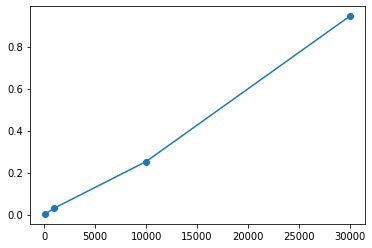

In [11]:
plt.plot([100, 1000, 10000, 30000], res, '-o')

In [12]:
arr_sorted = list(np.sort(np.arange(0, 1000, 30000)))
start = time.perf_counter()
sort_list(arr_sorted)
end = time.perf_counter()
print("Finished sorting list of {} numbers:  {} seconds".format(len(arr_sorted), end - start))

Finished sorting list of 1 numbers:  0.0003953999999999347 seconds


In [13]:
start = time.perf_counter()
sort_list(reversed(arr_sorted))
end = time.perf_counter()
print("Finished sorting list of {} numbers:  {} seconds".format(len(arr_sorted), end - start))

Finished sorting list of 1 numbers:  0.0003775999999997559 seconds


Uit https://www.bigocheatsheet.com kunne we zien  de tijds complextiteit van ee nbucket sort:


Best case: O($n + k$) <br>
In de beste scenario wordt er 1 keer door de lijst geitereerd -> n


Worst case: O($n^2$) <br>

Average case:O($n + k$) <br>

Het programma doorloopt vervolgens de negatieve getallen en zet ze om in positieve getallen (abs) voor n negatieve getallen. 2n


Herhaal vervolgens met zowel positieve als negatieve lijsten de volgende stappen twee keer:


- Ga een voor een door de gehele getallen van de lijst.(n)
- Sorteer alle buckets (n) 
- Run bucket_sort voor positieve getallen en voor negatieve getallen.
    De letter l staat voor de langste cijfers van de cijfers.

De abs van de "negatieve" getallen moet terugkeren naar negatief nadat het algoritme is uitgevoerd op zowel de "negatieve" als de "positieve" getallen, wat impliceert dat beide lijsten nu gesorteerd zijn.(2n)


De laatste stap is het samenvoegen van de positieve en negatieve lijsten.(n)


In dit geval staat k voor emmers.

Dit resulteert uiteindelijk in de volgende grote O:
O(6n) 

Deze wordt dan O(n)